In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Load dataset (change filename if needed)
df = pd.read_csv("ph_dengue_cases2016-2020.csv")  # or pd.read_csv("Dengue_PH.csv")
df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [26]:
# Check for missing values
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [28]:
# Convert Month to numeric
month_map = {
    "January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
    "July":7, "August":8, "September":9, "October":10, "November":11, "December":12,
    "Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6,
    "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12
}

if df["Month"].dtype == "object":
    df["Month_num"] = df["Month"].map(month_map)
else:
    df["Month_num"] = df["Month"]

df.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Month_num
0,January,2016,Region I,705,1,1
1,February,2016,Region I,374,0,2
2,March,2016,Region I,276,0,3
3,April,2016,Region I,240,2,4
4,May,2016,Region I,243,1,5


In [29]:
# One-hot encode Region
df_encoded = pd.get_dummies(df, columns=["Region"], drop_first=True)
df_encoded.head()
     

,Month,Year,Dengue_Cases,Dengue_Deaths,Month_num,Region_CAR,Region_NCR,Region_Region I,Region_Region II,Region_Region III,...,Region_Region IV-B,Region_Region IX,Region_Region V,Region_Region VI,Region_Region VII,Region_Region VIII,Region_Region X,Region_Region XI,Region_Region XII,Region_Region XIII
0,January,2016,705,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,February,2016,374,0,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,March,2016,276,0,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,April,2016,240,2,4,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,May,2016,243,1,5,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Define features and target
region_cols = [col for col in df_encoded.columns if col.startswith("Region_")]

X = df_encoded[["Year", "Month_num"] + region_cols]
y = df_encoded["Dengue_Cases"]

X.head(), y.head()
     

(   Year  Month_num  Region_CAR  Region_NCR  Region_Region I  Region_Region II  \
 0  2016          1       False       False             True             False   
 1  2016          2       False       False             True             False   
 2  2016          3       False       False             True             False   
 3  2016          4       False       False             True             False   
 4  2016          5       False       False             True             False   
 
    Region_Region III  Region_Region IV-A  Region_Region IV-B  \
 0              False               False               False   
 1              False               False               False   
 2              False               False               False   
 3              False               False               False   
 4              False               False               False   
 
    Region_Region IX  Region_Region V  Region_Region VI  Region_Region VII  \
 0             False            Fals

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
     

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===================================")
print(" LINEAR REGRESSION MODEL RESULTS ")
print("===================================")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

 LINEAR REGRESSION MODEL RESULTS 
MAE  : 745.47
MSE  : 1640069.20
RMSE : 1280.65
R²   : 0.0691


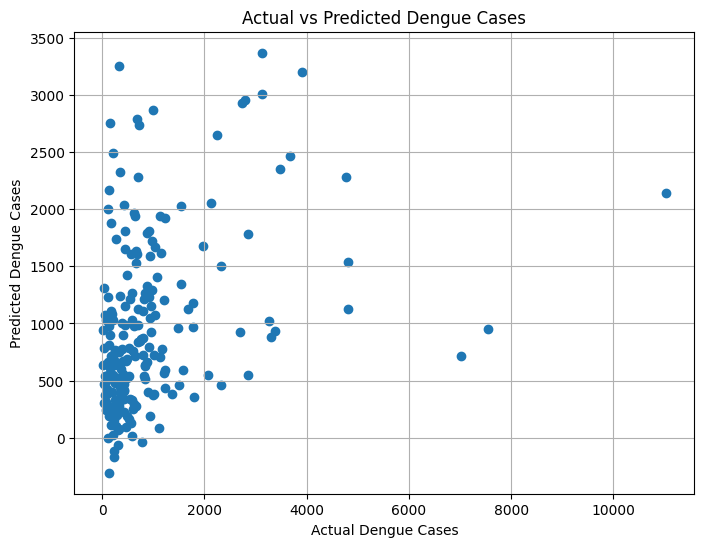

In [35]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Dengue Cases")
plt.ylabel("Predicted Dengue Cases")
plt.title("Actual vs Predicted Dengue Cases")
plt.grid(True)
plt.show()
     


### Average Dengue Cases per Month (Seasonality Plot)

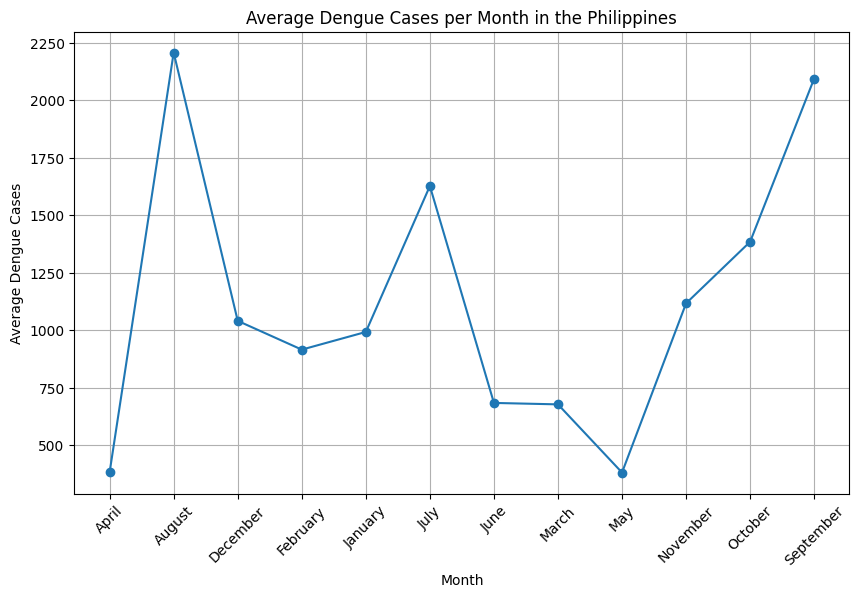

In [36]:
# Dengue Seasonality Visualization

monthly_avg = (
    df.groupby("Month")["Dengue_Cases"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(monthly_avg["Month"], monthly_avg["Dengue_Cases"], marker="o")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.title("Average Dengue Cases per Month in the Philippines")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

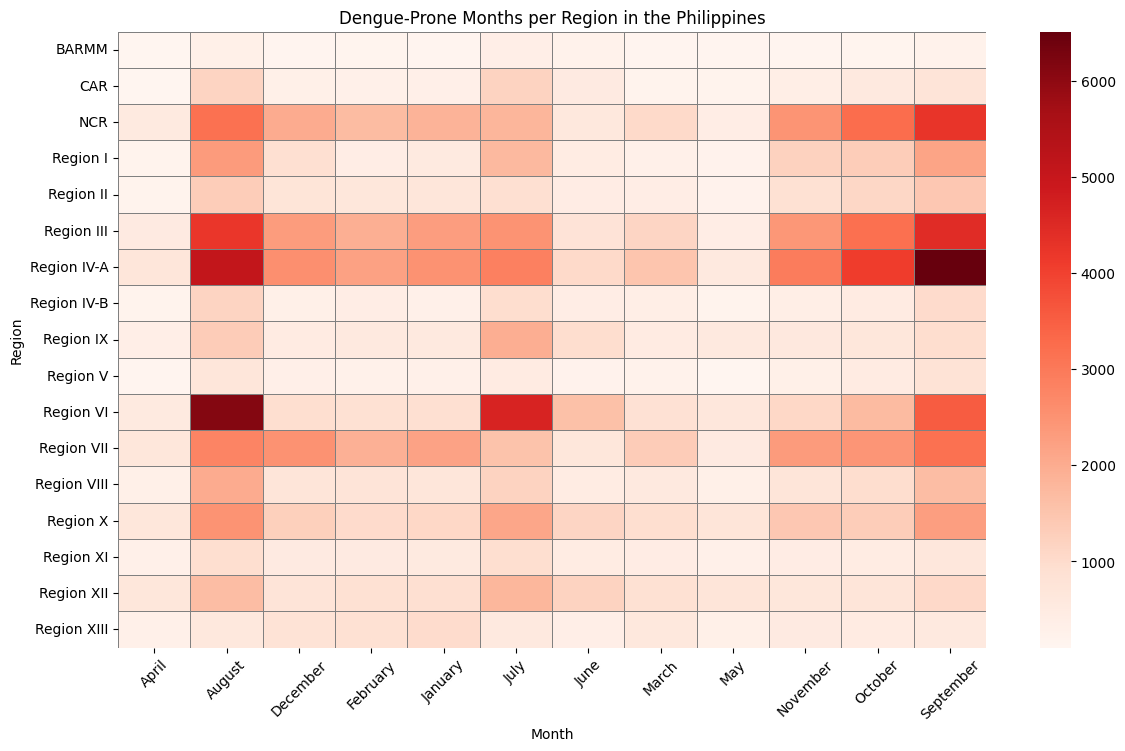

In [37]:
# Heatmap of Dengue-Prone Months per Region
# ======================================================

import seaborn as sns

# Pivot table: average dengue cases per region per month
heatmap_data = pd.pivot_table(
    df,
    values="Dengue_Cases",
    index="Region",
    columns="Month",
    aggfunc="mean"
)

plt.figure(figsize=(14,8))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Dengue-Prone Months per Region in the Philippines")
plt.xlabel("Month")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()

In [38]:
# Dengue-prone classification
risk_threshold = df_encoded["Dengue_Cases"].quantile(0.7)

df_encoded["Predicted_Cases"] = model.predict(X)
df_encoded["Dengue_Prone"] = np.where(
    df_encoded["Predicted_Cases"] >= risk_threshold,
    "High Risk",
    "Low Risk"
)

df_encoded[["Month", "Year", "Predicted_Cases", "Dengue_Prone"]].head()

,Month,Year,Predicted_Cases,Dengue_Prone
0,January,2016,386.720077,Low Risk
1,February,2016,469.695317,Low Risk
2,March,2016,552.670557,Low Risk
3,April,2016,635.645798,Low Risk
4,May,2016,718.621038,Low Risk


In [39]:
# Dengue-prone summary
dengue_prone_summary = (
    df_encoded
    .groupby(["Month", "Year"])
    .agg(
        Avg_Predicted_Cases=("Predicted_Cases", "mean"),
        High_Risk_Count=("Dengue_Prone", lambda x: (x == "High Risk").sum())
    )
    .reset_index()
)

dengue_prone_summary.head()

,Month,Year,Avg_Predicted_Cases,High_Risk_Count
0,April,2016,869.269772,6
1,April,2017,895.207451,6
2,April,2018,921.145130,6
3,April,2019,947.082809,6
4,April,2020,973.020488,6
